# This file outputs the average number of students a professor has had in the past 20 years 

In [1]:
%pip install -qqq matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from utils.get_all_dfs import * 

semesters = get_all_dfs("courses")
semester_labels = list(semesters.keys())

In [3]:
min_year = 2024-10

profs_students = {} #Format of "prof_name": [12, 20, 34] where each num is the number of students in that semester's course
for sem_label, sem_df in semesters.items():
    #If year is too early, skip
    if int(sem_label[0:4]) < min_year: continue
    
    #Otherwise, for every course in the semester, add the number of students to the profs_students dict with key as the professor
    for index, course in sem_df.iterrows():
        enrolled_students = course["enr"]
        # Skip unique courses with high enrollment
        if enrolled_students > 150: continue 
        
        prof = course["instructor"]
        if prof not in profs_students:
            profs_students[prof] = []

        #Otherwise add to prof's avgs
        profs_students[prof].append(course["enr"])

<BarContainer object of 30 artists>

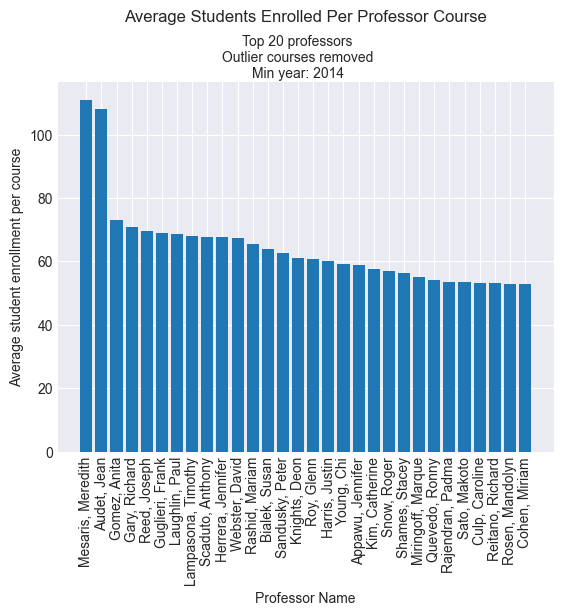

In [4]:

profs_avg_students = {prof: (sum(stu_counts)/len(stu_counts)) for (prof, stu_counts) in profs_students.items()}

# Sort the dictionary items by values in descending order
sorted_profs_avg_students = sorted(profs_avg_students.items(), key=lambda x: x[1], reverse=True)

# Take the top 5 items
top_20_profs = sorted_profs_avg_students[:30]
# Create a new dictionary with the top 5 items while preserving their order
top_20_dict = dict(top_20_profs)
top_20_prof_names = list(top_20_dict.keys())
top_20_prof_avg_students = list(top_20_dict.values())

#Chart setup
plt.title("Average Students Enrolled Per Professor Course\n\n\n")
plt.suptitle("Top 20 professors\n" + "Outlier courses removed\n" + f"Min year: {min_year}\n\n", fontsize=10)
plt.xlabel("Professor Name")
plt.ylabel("Average student enrollment per course")

# Chart styling
plt.style.use('seaborn-v0_8-darkgrid')
plt.xticks(rotation=90) # Rotate x-axis labels and align them to the right

#Show the chart
plt.bar(range(len(top_20_prof_names)), top_20_prof_avg_students, tick_label=top_20_prof_names)